## Merge

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import both dfs
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

data_conflict = pd.read_csv('df_conflict.csv')
data_DALY = pd.read_csv('df_DALY_SSA.csv')

'/Users/NatStrom'

In [3]:
data_conflict.dtypes

Unnamed: 0                       int64
year                             int64
type_of_violence                object
index                          float64
dummy_neighbor_hightreshold    float64
dummy_neighbor                 float64
iso                             object
dummy_conflict_hightreshold      int64
dummy_conflict                   int64
dummy_sb                         int64
dummy_ns                         int64
dummy_os                         int64
best_log                       float64
lag_best_5                     float64
lag_best_10                    float64
lag_best_20                    float64
dtype: object

In [4]:
data_DALY.dtypes

Unnamed: 0       int64
measure_name    object
country         object
location_id      int64
sex             object
age             object
rei_id           int64
cause_name      object
cause_id         int64
rei_name        object
year             int64
daly_mean        int64
daly_upper       int64
daly_lower       int64
iso             object
dtype: object

In [5]:
#inspect missingness
is_null = data_DALY.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_DALY.columns:
    pct_missing= np.mean(data_DALY[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

Unnamed: 0      0
measure_name    0
country         0
location_id     0
sex             0
age             0
rei_id          0
cause_name      0
cause_id        0
rei_name        0
year            0
daly_mean       0
daly_upper      0
daly_lower      0
iso             0
dtype: int64
             col  pct_missing
0     Unnamed: 0          0.0
1   measure_name          0.0
2        country          0.0
3    location_id          0.0
4            sex          0.0
5            age          0.0
6         rei_id          0.0
7     cause_name          0.0
8       cause_id          0.0
9       rei_name          0.0
10          year          0.0
11     daly_mean          0.0
12    daly_upper          0.0
13    daly_lower          0.0
14           iso          0.0


In [6]:
#inspect missingness
is_null = data_conflict.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_conflict.columns:
    pct_missing= np.mean(data_conflict[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

Unnamed: 0                        0
year                              0
type_of_violence                898
index                          1906
dummy_neighbor_hightreshold    1906
dummy_neighbor                 1906
iso                               0
dummy_conflict_hightreshold       0
dummy_conflict                    0
dummy_sb                          0
dummy_ns                          0
dummy_os                          0
best_log                        898
lag_best_5                     1075
lag_best_10                    1232
lag_best_20                    1247
dtype: int64
                            col  pct_missing
0                    Unnamed: 0     0.000000
1                          year     0.000000
2              type_of_violence     1.927535
3                         index     4.091182
4   dummy_neighbor_hightreshold     4.091182
5                dummy_neighbor     4.091182
6                           iso     0.000000
7   dummy_conflict_hightreshold     0.000000
8     

In [7]:
data_DALY = data_DALY.rename(columns= {'year':'year_id'})
data_conflict = data_conflict.rename(columns= {'year':'year_id'})

In [8]:
from ingester3.scratch import cache_manager

cache_manager()

# This will import the Pandas extensions as well as bootstrap the object layer
from ingester3.extensions import *

Clearing Secondary Cache...


In [9]:
data_DALY.iso.unique()

array(['COG', 'MWI', 'MDG', 'GNQ', 'AGO', 'COM', 'ETH', 'ERI', 'BWA',
       'BDI', 'CAF', 'NER', 'DJI', 'TCD', 'MRT', 'CPV', 'MOZ', 'ZMB',
       'CIV', 'GAB', 'SWZ', 'ZWE', 'BEN', 'COD', 'SOM', 'LSO', 'NAM',
       'STP', 'SSD', 'ZAF', 'UGA', 'KEN', 'NGA', 'MLI', 'SDN', 'LBR',
       'TGO', 'TZA', 'GMB', 'RWA', 'GIN', 'GHA', 'CMR', 'BFA', 'SEN',
       'SLE', 'GNB'], dtype=object)

In [10]:
data_conflict.iso.unique()

array(['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CAF', 'TCD',
       'COM', 'COG', 'DJI', 'COD', 'EGY', 'ERI', 'ETH', 'GMB', 'GHA',
       'GIN', 'GNB', 'CIV', 'KEN', 'SWZ', 'LSO', 'LBR', 'LBY', 'MDG',
       'MLI', 'MRT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'RWA', 'SEN',
       'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA',
       'ZMB', 'ZWE', 'CPV', 'GNQ', 'STP', 'MWI', 'GAB', 'MUS', 'SYC'],
      dtype=object)

In [11]:
data_conflict = data_conflict.loc[data_conflict['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]

In [12]:
data_DALY = data_DALY.pivot_table(index=['iso','year_id'],columns=['cause_name','rei_name','sex','age'],values=['daly_mean'],  aggfunc= 'sum')

data_DALY.assign(**data_DALY.index.to_frame()) #need to do this if the data is multihierarchical

data_DALY.columns = ['_'.join(col) for col in data_DALY.columns]
data_DALY=data_DALY.reset_index()
data_DALY

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages,daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages,daly_mean_Enteric infections_Unsafe water source_btsx_All ages,daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages,daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages
0,AGO,1990,12264,17229,23733,12264,17229,23733,8904,17229,23733,8904,17229,23733,3360,3360
1,AGO,1991,11985,16760,23173,11985,16760,23173,8693,16760,23173,8693,16760,23173,3291,3291
2,AGO,1992,11662,16176,22487,11662,16176,22487,8433,16176,22487,8433,16176,22487,3228,3228
3,AGO,1993,11480,15822,22089,11480,15822,22089,8283,15822,22089,8283,15822,22089,3196,3196
4,AGO,1994,11380,15681,21970,11380,15681,21970,8236,15681,21970,8236,15681,21970,3144,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,ZWE,2015,1672,1155,1739,1672,1155,1739,632,1155,1739,632,1155,1739,1040,1040
1406,ZWE,2016,1630,1110,1682,1630,1110,1682,610,1110,1682,610,1110,1682,1019,1019
1407,ZWE,2017,1578,1073,1638,1578,1073,1638,593,1073,1638,593,1073,1638,984,984
1408,ZWE,2018,1503,1001,1539,1503,1001,1539,557,1001,1539,557,1001,1539,946,946


## Merge

In [13]:
data_DALY

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages,daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages,daly_mean_Enteric infections_Unsafe water source_btsx_All ages,daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages,daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages
0,AGO,1990,12264,17229,23733,12264,17229,23733,8904,17229,23733,8904,17229,23733,3360,3360
1,AGO,1991,11985,16760,23173,11985,16760,23173,8693,16760,23173,8693,16760,23173,3291,3291
2,AGO,1992,11662,16176,22487,11662,16176,22487,8433,16176,22487,8433,16176,22487,3228,3228
3,AGO,1993,11480,15822,22089,11480,15822,22089,8283,15822,22089,8283,15822,22089,3196,3196
4,AGO,1994,11380,15681,21970,11380,15681,21970,8236,15681,21970,8236,15681,21970,3144,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,ZWE,2015,1672,1155,1739,1672,1155,1739,632,1155,1739,632,1155,1739,1040,1040
1406,ZWE,2016,1630,1110,1682,1630,1110,1682,610,1110,1682,610,1110,1682,1019,1019
1407,ZWE,2017,1578,1073,1638,1578,1073,1638,593,1073,1638,593,1073,1638,984,984
1408,ZWE,2018,1503,1001,1539,1503,1001,1539,557,1001,1539,557,1001,1539,946,946


In [14]:
#import the control variables
data_dah = pd.read_csv('control variables/data_dah.csv')
data_wdi = pd.read_csv('control variables/data_wdi.csv')
data_vn = pd.read_csv('control variables/data_vn.csv')
data_disaster = pd.read_csv('control variables/data_disaster.csv')
data_wash = pd.read_csv('control variables/data_wash.csv')
data_hwd = pd.read_csv('control variables/data_hwd.csv')

In [15]:
data_hwd.iso.unique()

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'], dtype=object)

In [16]:
data_wash.iso.unique()
#missingg south sudan

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF', 'ZMB',
       'ZWE'], dtype=object)

In [17]:
data_DALY.iso.unique()

array(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'], dtype=object)

In [18]:
data_conflict.iso.unique()

array(['AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CAF', 'TCD', 'COM',
       'COG', 'DJI', 'COD', 'ERI', 'ETH', 'GMB', 'GHA', 'GIN', 'GNB',
       'CIV', 'KEN', 'SWZ', 'LSO', 'LBR', 'MDG', 'MLI', 'MRT', 'MOZ',
       'NAM', 'NER', 'NGA', 'RWA', 'SEN', 'SLE', 'SOM', 'ZAF', 'SSD',
       'SDN', 'TZA', 'TGO', 'UGA', 'ZMB', 'ZWE', 'CPV', 'GNQ', 'STP',
       'MWI', 'GAB'], dtype=object)

In [19]:
data_dah = data_dah.groupby(['iso','year_id']).sum()
data_dah = data_dah.reset_index()
data_dah

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_4243/3748761340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_dah = data_dah.groupby(['iso','year_id']).sum()


,iso,year_id,Unnamed: 0,ihme_dah_total_aid,dah_total_log
0,AGO,1990,87,21733.0,9.986587
1,AGO,1991,88,29906.0,10.305814
2,AGO,1992,89,26620.0,10.189418
3,AGO,1993,90,14315.0,9.569063
4,AGO,1994,91,11775.0,9.373734
...,...,...,...,...,...
1350,ZWE,2014,4512,366808.0,12.812594
1351,ZWE,2015,4513,491662.0,13.105547
1352,ZWE,2016,4514,385735.0,12.862906
1353,ZWE,2017,4515,436510.0,12.986567


In [20]:
data_wdi = data_wdi.groupby(['iso','year_id']).sum()
data_wdi = data_wdi.reset_index()
display(data_wdi)

data_vn = data_vn.groupby(['iso','year_id']).sum()
data_vn = data_vn.reset_index()
display(data_vn)

data_disaster = data_disaster.groupby(['iso','year_id']).sum()
data_disaster = data_disaster.reset_index()
display(data_disaster)

data_wash = data_wash.groupby(['iso','year_id']).sum()
data_wash = data_wash.reset_index()
display(data_wash)

data_hwd = data_hwd.groupby(['iso','year_id']).sum()
data_hwd = data_hwd.reset_index()
display(data_hwd)

,iso,year_id,Unnamed: 0,age0014_value,gdp_pcap_value,xpd_gdp_value,gdp_log
0,AGO,1990,7984,46.586185,949.286381,0.000000,6.855711
1,AGO,1991,8250,46.711935,867.123435,0.000000,6.765181
2,AGO,1992,8516,46.812493,657.653384,0.000000,6.488678
3,AGO,1993,8782,46.896062,442.445234,0.000000,6.092317
4,AGO,1994,9048,46.961591,329.691784,0.000000,5.798158
...,...,...,...,...,...,...,...
1405,ZWE,2015,14895,42.872671,1410.329174,21.809416,7.251578
1406,ZWE,2016,15161,42.517883,1421.787789,25.236347,7.259670
1407,ZWE,2017,15427,42.152298,1192.107012,28.413719,7.083478
1408,ZWE,2018,15693,41.798795,2269.177012,10.977280,7.727172


,iso,year_id,Unnamed: 0,death_tot,tot_affect
0,AGO,1995.0,0,0.0,1007.0
1,AGO,1997.0,1,0.0,105000.0
2,AGO,1998.0,2,115.0,1113.0
3,AGO,1999.0,3,188.0,873.0
4,AGO,2000.0,4,77.0,79128.0
...,...,...,...,...,...
911,ZWE,2015.0,911,10.0,475.0
912,ZWE,2016.0,912,31.0,2000.0
913,ZWE,2017.0,913,251.0,7013023.0
914,ZWE,2018.0,914,12.0,5164.0


,iso,year_id,Unnamed: 0,pg_id,gdis_count,gdis_nunique,gdis_count_lag
0,AGO,1990,0,48689148,13.0,13.0,2.639057
1,AGO,1991,1,48689148,0.0,0.0,0.000000
2,AGO,1992,2,48689148,11.0,11.0,2.484907
3,AGO,1993,3,48689148,0.0,0.0,0.000000
4,AGO,1994,4,48689148,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
1111,ZWE,2015,1111,13811629,59.0,57.0,4.094345
1112,ZWE,2016,1112,13811629,42.0,38.0,3.761200
1113,ZWE,2017,1113,13811629,261.0,117.0,5.568345
1114,ZWE,2018,1114,13811629,19.0,19.0,2.995732


,iso,year_id,Unnamed: 0,access_drinkwater_index,access_sani_index
0,AGO,1995,0,0.000000,0.000000
1,AGO,1996,1,0.000000,0.000000
2,AGO,1997,2,0.000000,0.000000
3,AGO,1998,3,0.000000,0.000000
4,AGO,1999,4,0.000000,0.000000
...,...,...,...,...,...
1191,ZWE,2016,1191,30.183683,26.877909
1192,ZWE,2017,1192,29.997683,26.576824
1193,ZWE,2018,1193,29.827913,26.272073
1194,ZWE,2019,1194,29.673569,25.963544


,iso,year_id,Unnamed: 0,ihme_healthworkers_all_mean
0,AGO,1990,0,29.271
1,AGO,1991,1,28.972
2,AGO,1992,2,29.670
3,AGO,1993,3,29.840
4,AGO,1994,4,29.909
...,...,...,...,...
1405,ZWE,2015,1405,43.979
1406,ZWE,2016,1406,44.146
1407,ZWE,2017,1407,45.486
1408,ZWE,2018,1408,46.874


In [21]:
data_wash = data_wash.drop(columns={'Unnamed: 0'})

In [22]:
#merge the datasets on iso and year
data_merged = pd.merge(data_DALY, data_conflict, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [23]:
is_null = data_merged.isna().sum()
print(is_null)

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                       0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                       0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                     0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                     0


In [24]:
data_merged = pd.merge(data_merged, data_dah, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [25]:
data_merged = pd.merge(data_merged, data_wdi, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [26]:
data_merged = pd.merge(data_merged, data_hwd, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_4243/212055127.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(data_merged, data_hwd, how="outer", on=["iso", "year_id"])


In [27]:
data_merged = pd.merge(data_merged, data_wash, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [28]:
data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["iso", "year_id"]),data_disaster,on=["iso", "year_id"])

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_4243/2981668124.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["iso", "year_id"]),data_disaster,on=["iso", "year_id"])


In [29]:
list(data_merged.columns)

['iso',
 'year_id',
 'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
 'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
 'daly_mean_All causes_Unsafe water source_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe water source_btsx_All ages',
 'daly_mean_Lower respiratory in

In [31]:
data_merged = data_merged.drop(columns={'Unnamed: 0_y','Unnamed: 0_x'})

In [32]:
#inspect missingness
is_null = data_merged.isna().sum()
print(is_null)

iso                                                                                                                        0
year_id                                                                                                                    0
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                       0
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                       0
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                     0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                       0
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages                     0


In [33]:
values_list = list()
cols_list = list() 
for col in data_merged.columns:
    pct_missing= np.mean(data_merged[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

                                                  col  pct_missing
0                                                 iso     0.000000
1                                             year_id     0.000000
2   daly_mean_All causes_No access to handwashing ...     0.000000
3   daly_mean_All causes_Unsafe sanitation_btsx_Al...     0.000000
4   daly_mean_All causes_Unsafe water source_btsx_...     0.000000
5   daly_mean_Communicable, maternal, neonatal, an...     0.000000
6   daly_mean_Communicable, maternal, neonatal, an...     0.000000
7   daly_mean_Communicable, maternal, neonatal, an...     0.000000
8   daly_mean_Diarrheal diseases_No access to hand...     0.000000
9   daly_mean_Diarrheal diseases_Unsafe sanitation...     0.000000
10  daly_mean_Diarrheal diseases_Unsafe water sour...     0.000000
11  daly_mean_Enteric infections_No access to hand...     0.000000
12  daly_mean_Enteric infections_Unsafe sanitation...     0.000000
13  daly_mean_Enteric infections_Unsafe water sour...     0.00

In [34]:
data_final = data_merged.copy()

In [35]:
data_final['daly_all'] = data_final['daly_mean_All causes_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe sanitation_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe water source_btsx_All ages']
data_final['daly_respirat'] = data_final['daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages']
data_final['daly_enteric'] = data_final['daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe water source_btsx_All ages']
data_final['daly_diarrheal'] = data_final['daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages']
data_final['daly_cmnn'] = data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages']

In [36]:
data_final = data_final.loc[data_final['year_id'] <=2019]
data_final

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [ ]:
values_list = list()
cols_list = list() 
for col in data_final.columns:
    pct_missing= np.mean(data_final[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

# descriptives

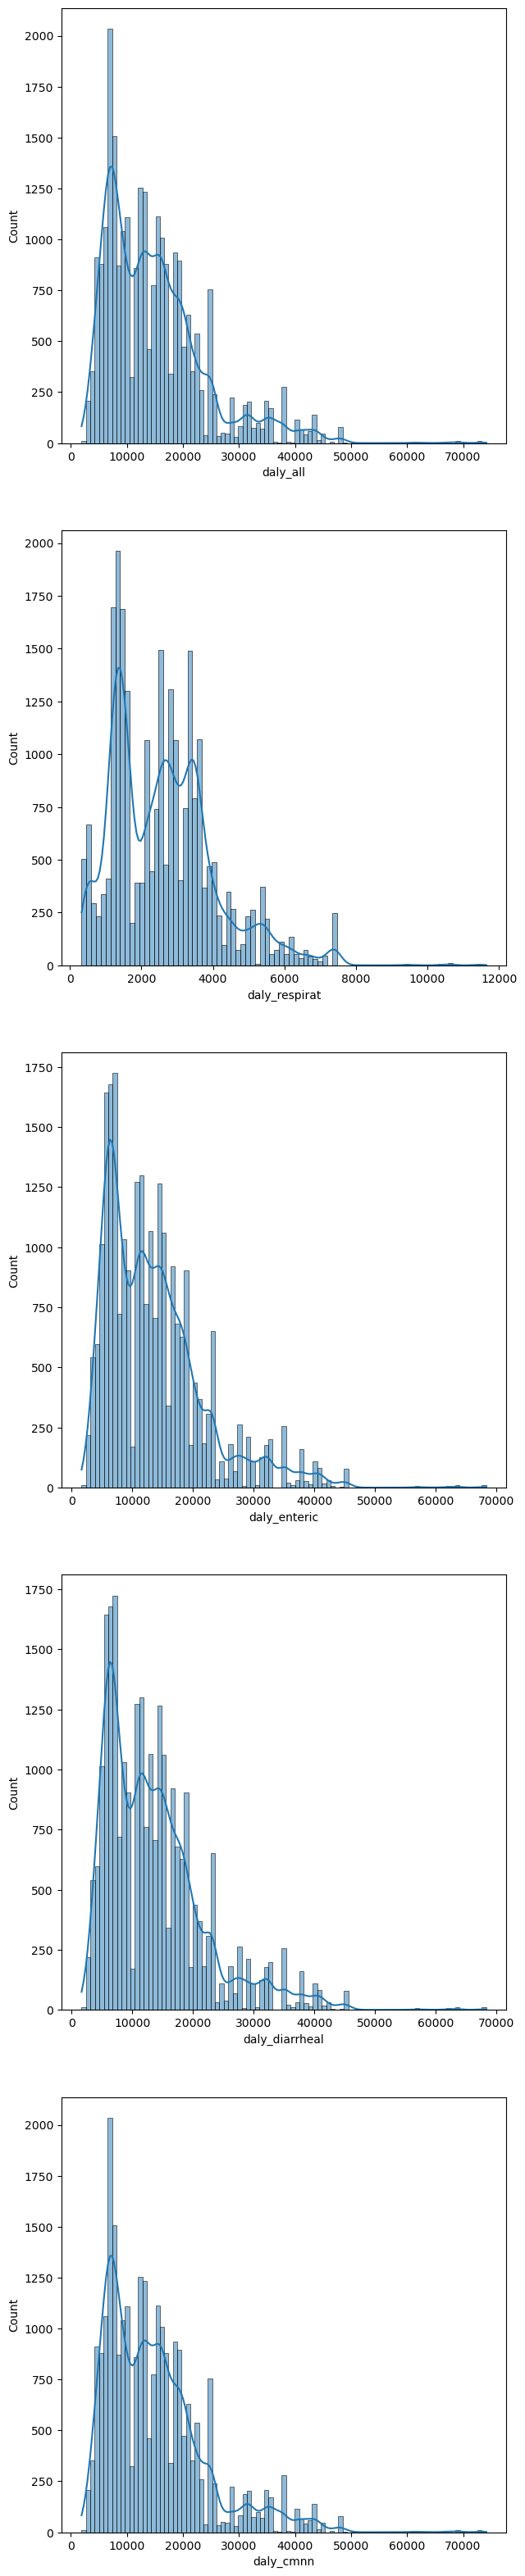

In [37]:
plot =figure, axes = plt.subplots(5,1,figsize=(7,40))
sns.histplot(data_final['daly_all'],kde = True,ax=axes[0])
sns.histplot(data_final['daly_respirat'],kde = True,ax=axes[1])
sns.histplot(data_final['daly_enteric'],kde = True,ax=axes[2])
sns.histplot(data_final['daly_diarrheal'],kde = True,ax=axes[3])
sns.histplot(data_final['daly_cmnn'],kde = True,ax=axes[4])

plt.savefig('daly1c.png')

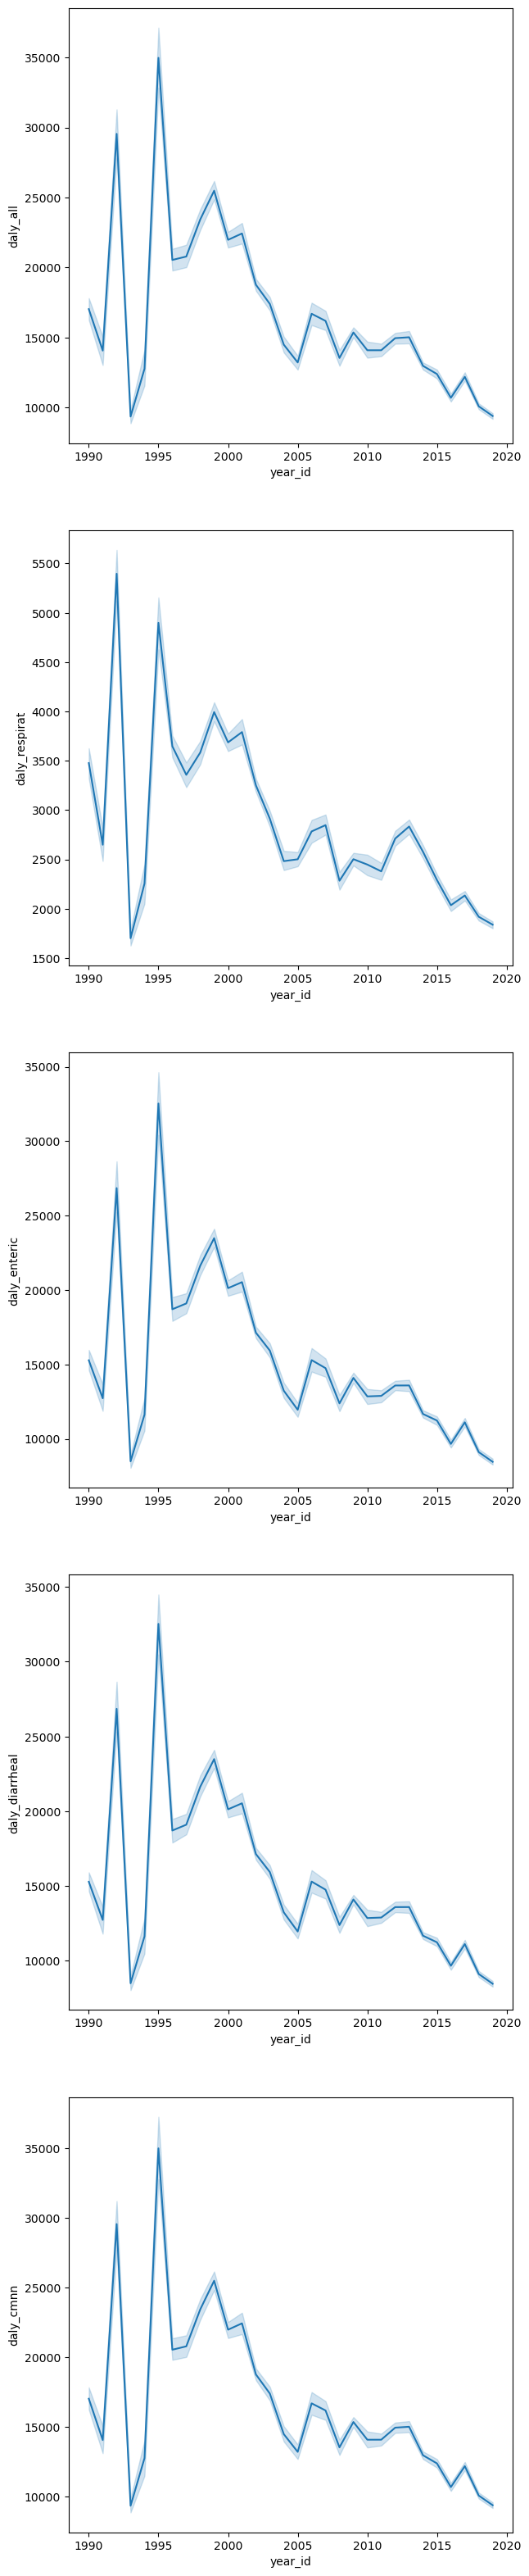

In [38]:

figure, axes = plt.subplots(5,1,figsize=(7,40))
sns.lineplot(x= 'year_id',y='daly_all',data=data_final,ax=axes[0])
sns.lineplot(x= 'year_id',y='daly_respirat',data=data_final,ax=axes[1])
sns.lineplot(x= 'year_id',y='daly_enteric',data=data_final,ax=axes[2])
sns.lineplot(x= 'year_id',y='daly_diarrheal',data=data_final,ax=axes[3])
sns.lineplot(x= 'year_id',y='daly_cmnn',data=data_final,ax=axes[4])

plt.savefig('daly2.png')

In [39]:
data_final.to_csv('data_final.csv')